<a href="https://www.kaggle.com/code/aaradhyakulkarni/chapt-2-hands-on-ml?scriptVersionId=208669302" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Imports


In [1]:
import sys 

assert sys.version_info >= (3,7)

In [2]:
from packaging import version 
import sklearn

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

In [4]:
from pathlib import Path 
import tarfile
import urllib.request

# Utility

In [5]:
# Maptlotlib default configuration

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


In [6]:
IMAGES_PATH = Path()/"images"/"end_to_end"
IMAGES_PATH.mkdir(parents = True, exist_ok = True)

def save_fig(fig_id,tight_layout = True, fig_extension = 'png', resolution = 320):
    path = IMAGES_PATH / f'{fig_id}.{fig_extension}'
    if tight_layout :
        plt.tight_layout()
    plt.savefig(path, format = fig_extension, dpi = resolution )

# Data Loading

In [7]:
def load_housing_dataset():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))


In [8]:
housing = load_housing_dataset()

In [9]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


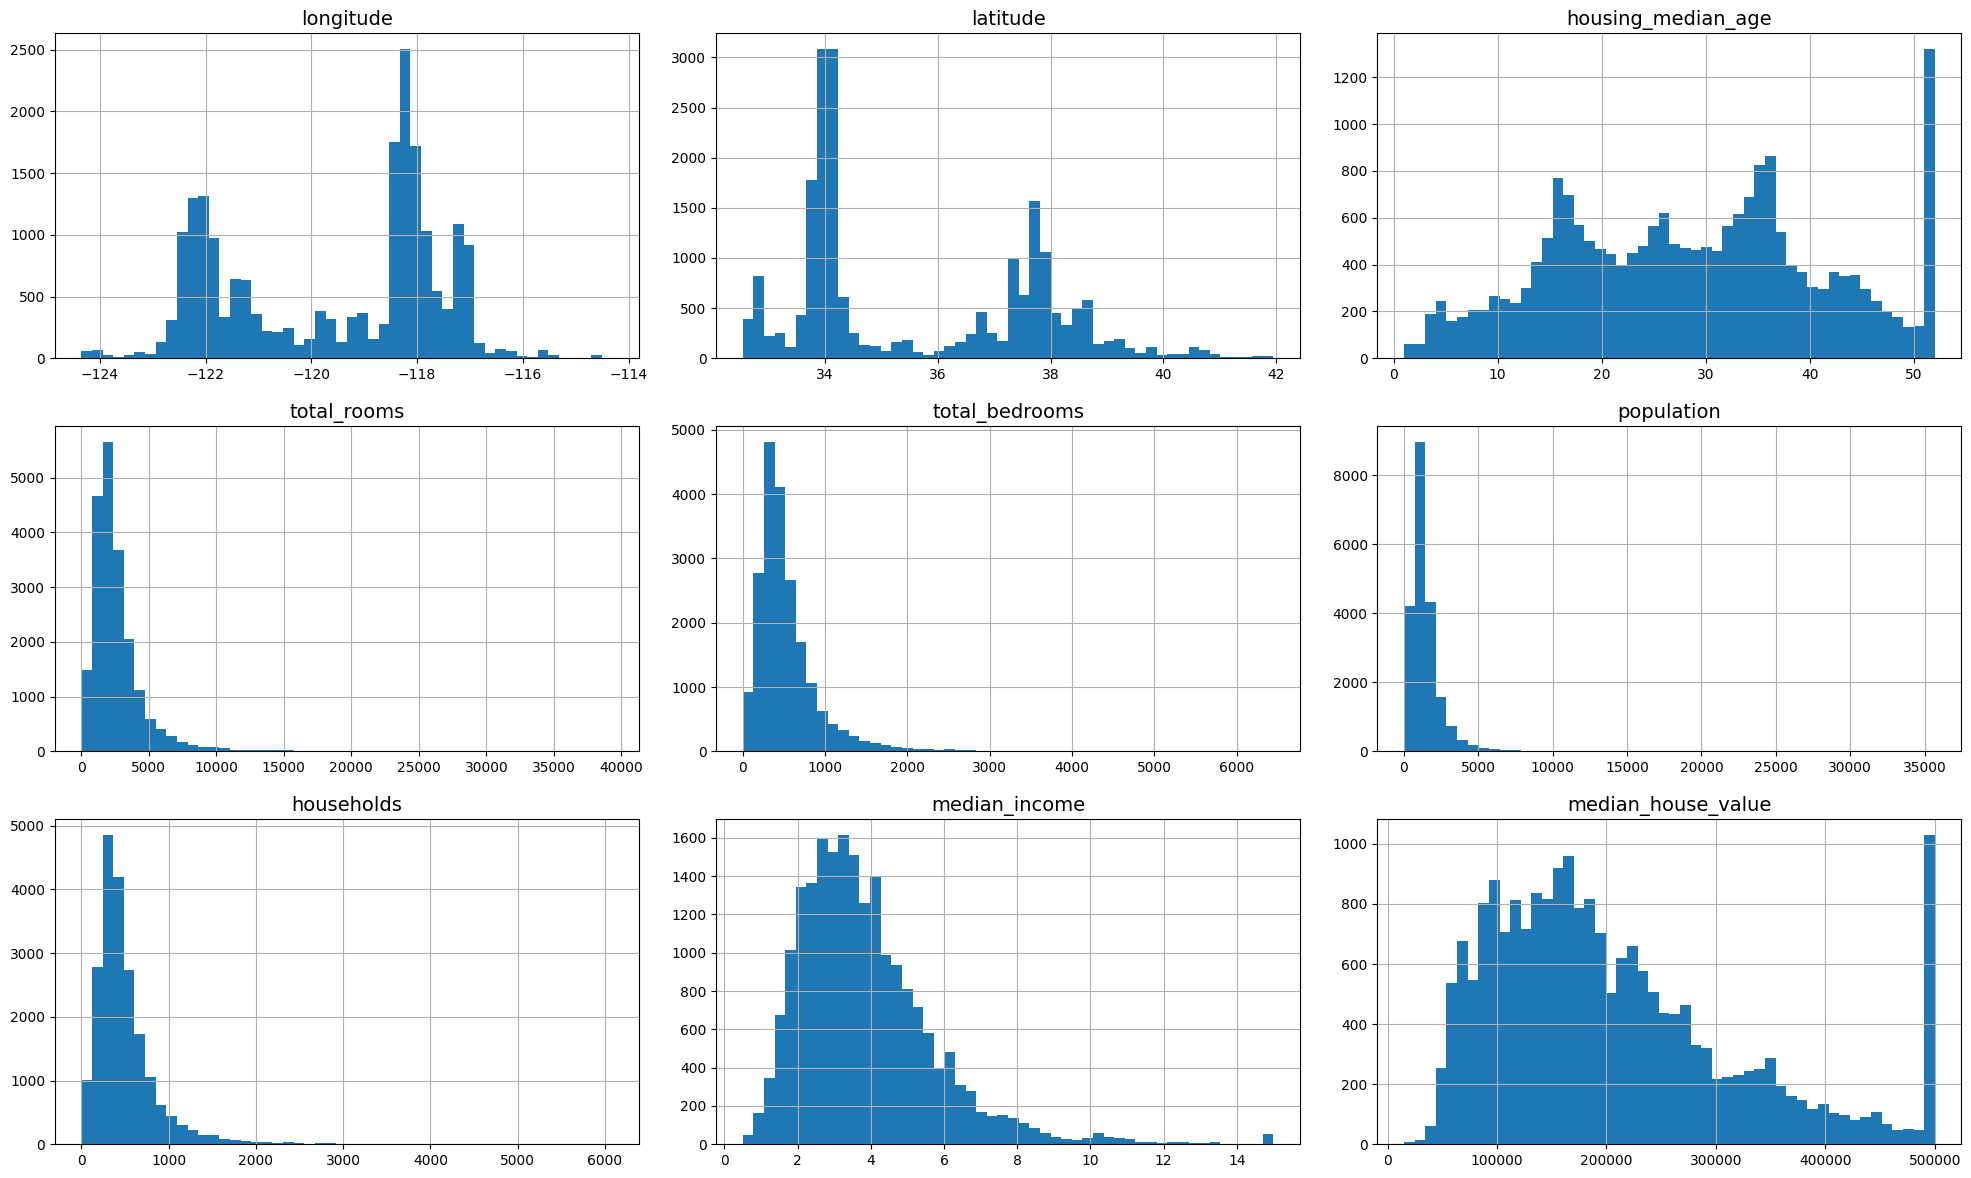

In [11]:
housing.hist(bins = 50, figsize=(20,12))
save_fig("Attributes of housing dataset")
plt.show()

In [12]:
from scipy.stats import binom

In [13]:
sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929942


In [14]:
samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)
((samples < 485) | (samples > 535)).mean()

0.1073

# Creating test set

In [15]:
def shuffle_and_split(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]

    return data.iloc[train_indices], data.iloc[test_indices]

In [16]:
np.random.seed(42)

above function may change the instances in train and test when re-run. to keep it consisten we can use 
```python
np.random.seed(value)
```



However, when the data is updated these solutions will not work so instead we can use intance identifierss to keep them consisten. 
compute a hash of each instance’s
identifier and put that instance in the test set if the hash is lower than or equal
tvalue0% of the maximum hash valu

This simply means that the instances which were in train before should not go in test sete.

In [17]:
from zlib import crc32

#crc32 is a hash function which returns a 32-bit integer

In [18]:
def is_in_test_set(identifier,test_size_ratio):
    return crc32(np.int64(identifier))<test_size_ratio*2*32


def split_data_with_hash(data, test_size_ratio,id_column):
    ids = data[id_column]
    in_test = ids.apply(lambda id_ : is_in_test_set(ids,test_size_ratio))
    return data.loc[~in_test] , data.loc[in_test]

if the dataset does not have an identifier column, we can use index column.
```python
# to add index column
df_with_id = df.reset_index()
```

in our case instead of using index we can create and identifier using longitude and latitude which are not meant to change for next mannyyyy years



In [19]:
housing["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_hash(housing, 0.2, "id")

or directly use train_test_split from sklearn

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

## binning

using pd.cut 

pd.cut(df['column'],
        bins = [# list of class_boundaries],
        labels =[#list of labels for classes])

```python


```


In [22]:
housing['income_cat'] = pd.cut(housing['median_income'],
                                bins = [0.,1.5,3.0,4.5,6.0,np.inf],
                                labels = [1,2,3,4,5])

In [23]:
housing['income_cat'].value_counts().sort_index()

income_cat
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64

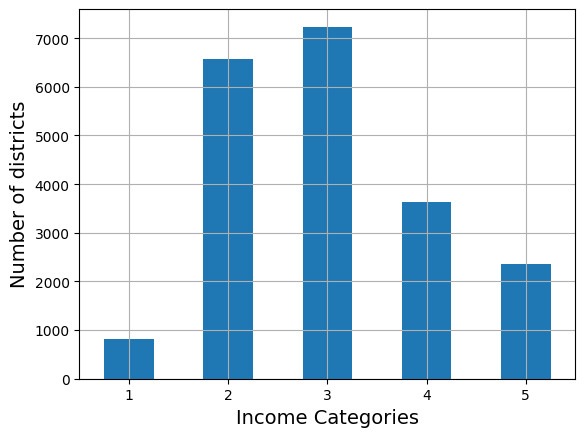

In [24]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot = 0, grid=True)
plt.xlabel("Income Categories")
plt.ylabel("Number of districts")
plt.show()

##### Lets try some more splitting methods from sklearn

each splitter has a split() function which returns training and test *indices*

A stratified split ensures that the training and test sets have the same proportion of instances for each class as the original dataset. This is particularly useful when dealing with imbalanced datasets, where some classes are underrepresented.

How Stratified Split Wor
k- s
Identify Strat:

The dataset is divided into strata based on the target variable or another feature. Each stratum contains instances with the same value for the target varia- ble.
Split Each Str    tum:

Each stratum is split into training and test sets according to the specified ratio (e.g., 80% training, 20%-  test).
CombineTtrata:

The training sets from all strata are combined to form the final training set, and the test sets from all strata are combined to form the final test set.

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit


To get multiple splits

In [26]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [27]:
strat_train_set, strat_test_set = strat_splits[0]

To get single split

- Use stratify parameter in train_test_split

In [28]:
strat_train_set, strat_test_set = train_test_split(
housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [29]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [30]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


# Explore and Visualize data

In [31]:
housing = strat_train_set.copy()

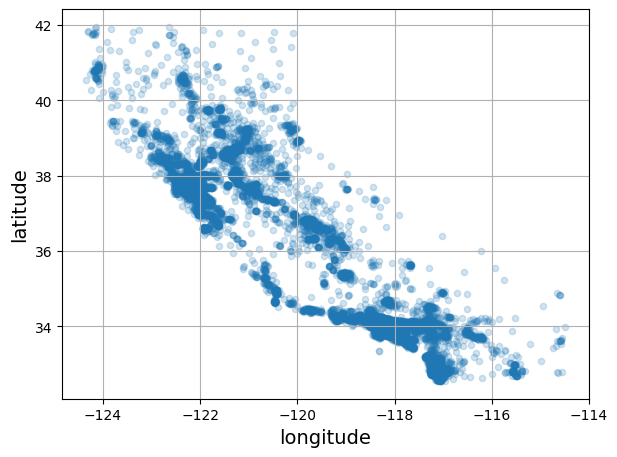

In [32]:

housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha = 0.2)
save_fig("bad_visualization_plot")  # extra code
plt.show()

**cmap** = "*jet*" uses colour range blue to red (low to high)

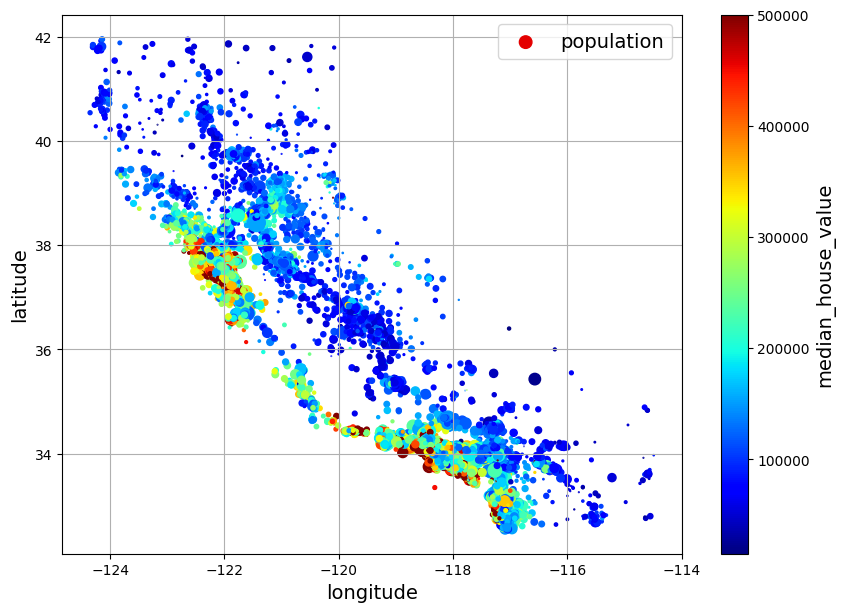

In [33]:
housing.plot(kind = 'scatter', 
            x='longitude',
            y='latitude',
            grid = True,
            s = housing['population']/100, #set size of point
            label='population',
            c='median_house_value', #color of point
            cmap='jet',
            colorbar=True,
            legend=True,
            # sharex = False,
            figsize=(10,7))

plt.show()

Checking correlation

In [34]:
corr_matrix = housing.corr(numeric_only = True)

In [35]:
corr_matrix['median_house_value'].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
id                   -0.051058
latitude             -0.139584
Name: median_house_value, dtype: float64

In [36]:
from pandas.plotting import scatter_matrix

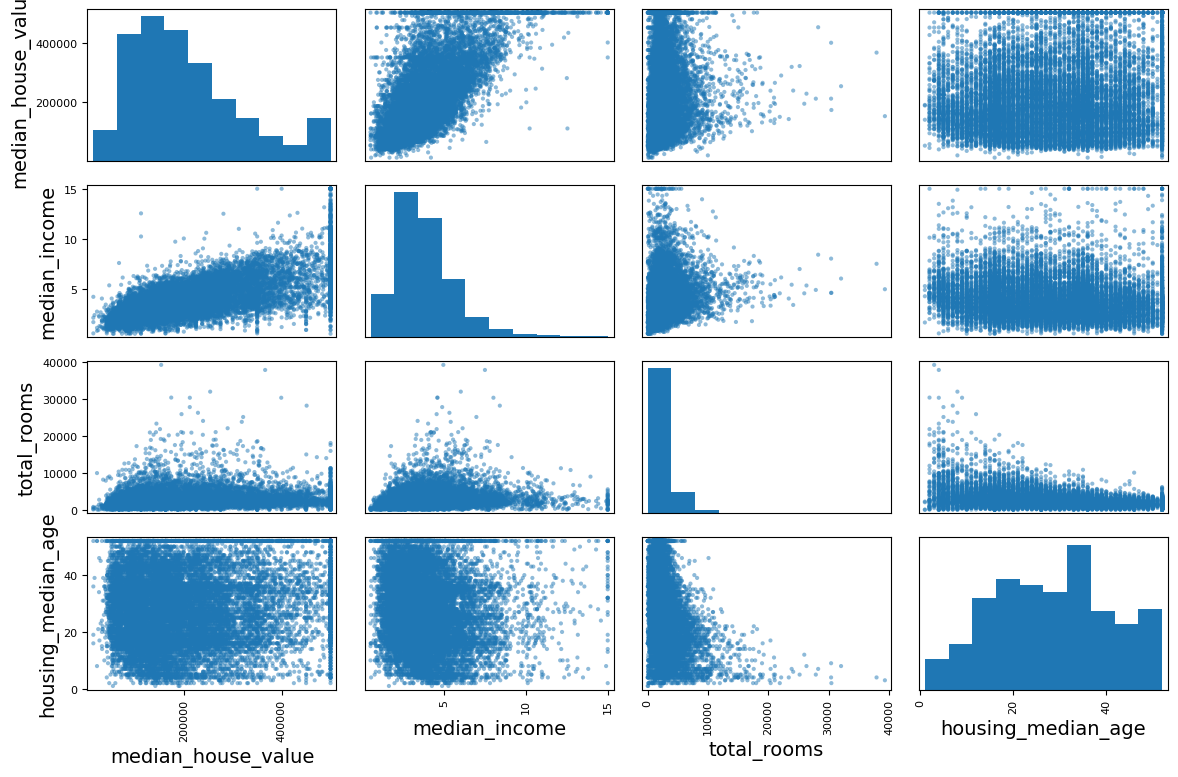

In [37]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot") 
plt.show()

In [38]:

housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [39]:

corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
id                   -0.051058
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

In [40]:
housing = housing.drop(columns = ['id','income_cat'])

In [41]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# Clean the data

In [42]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
ocean_proximity         0
id                      0
income_cat              0
dtype: int64

In [43]:

null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,id,income_cat
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND,-120629.50,3
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN,-117925.97,3
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN,-118015.96,3
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN,-118845.83,4
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN,-117836.38,5


In [44]:
# housing.dropna(subset=["total_bedrooms"], inplace=True) # option 1
# housing.drop("total_bedrooms", axis=1) # option 2


In [45]:
housing_option3 = housing.copy()

median = housing["total_bedrooms"].median()
housing_option3["total_bedrooms"].fillna(median, inplace=True)  # option 3

housing_option3['total_bedrooms'].loc[null_rows_idx].head()

/tmp/ipykernel_30/3538999757.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_option3["total_bedrooms"].fillna(median, inplace=True)  # option 3


14452    434.0
18217    434.0
11889    434.0
20325    434.0
14360    434.0
Name: total_bedrooms, dtype: float64

SimpleImputer

In [46]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [47]:

housing_num = housing.select_dtypes(include=[np.number])

imputer.fit(housing_num)

print(imputer.statistics_)
print(housing_num.median().values)

[-1.18510000e+02  3.42600000e+01  2.90000000e+01  2.12500000e+03
  4.34000000e+02  1.16700000e+03  4.08000000e+02  3.53850000e+00
 -1.18475755e+05]
[-1.18510000e+02  3.42600000e+01  2.90000000e+01  2.12500000e+03
  4.34000000e+02  1.16700000e+03  4.08000000e+02  3.53850000e+00
 -1.18475755e+05]


In [48]:
X = imputer.transform(housing_num)

In [49]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'id'], dtype=object)

In [50]:

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [51]:
housing_tr.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
id                    0
dtype: int64

# Handling text and Categorical data

In [52]:
# Extract the 'ocean_proximity' column from the housing DataFrame
# This column contains categorical data indicating the proximity of houses to the ocean.
housing_cat = housing[["ocean_proximity"]]

# Display a random sample of 8 rows from the 'ocean_proximity' column
# This helps to understand the distribution and variety of categories in the data.
housing_cat.sample(8)

,ocean_proximity
3807,NEAR BAY
11286,INLAND
6443,NEAR BAY
10498,INLAND
10656,<1H OCEAN
19397,INLAND
10741,NEAR OCEAN
1787,INLAND


#### Ordinal Encoder



In [53]:
from sklearn.preprocessing import OrdinalEncoder

In [54]:
# Import the OrdinalEncoder from scikit-learn
# OrdinalEncoder is used to convert categorical values into integer values.
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit the encoder to the 'ocean_proximity' column and transform it
# This step assigns an integer value to each category in the 'ocean_proximity' column.
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

# Display the categories identified by the OrdinalEncoder
# This shows the mapping of categories to integer values.
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [55]:
from sklearn.preprocessing import OneHotEncoder


In [56]:
# Initialize the OneHotEncoder with sparse_output set to False
# Setting sparse_output to False ensures that the output is a dense array.
cat_encoder = OneHotEncoder(sparse_output=False)

# Fit the encoder to the 'ocean_proximity' column and transform it
# This step creates a binary column for each category and assigns a 1 or 0 to indicate the presence of the category.
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [57]:
# Create a new DataFrame with some test data
# This DataFrame contains new instances with categories that need to be encoded.
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})

# Use pandas get_dummies to one-hot encode the test data
# This is an alternative method to one-hot encode categorical data using pandas.
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [58]:
# Transform the test data using the previously fitted OneHotEncoder
# This ensures that the new data is encoded using the same categories as the training data.
cat_encoder.transform(df_test)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [59]:
# Create a new DataFrame with some unknown categories
# This DataFrame contains categories that were not seen during the fitting of the encoder.
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})

# Use pandas get_dummies to one-hot encode the test data with unknown categories
# This method will create new columns for the unknown categories.
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


When any transformer is applied (OHE) it remembers the feature names, which is very important when working with a pipeline

In [60]:
# Display the feature names that the OneHotEncoder remembers
# This shows the original feature names that were used during fitting.
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [61]:
# Get the output feature names from the OneHotEncoder
# This provides the names of the one-hot encoded columns.
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [62]:
# Set the OneHotEncoder to ignore unknown categories during transformation
# This prevents errors when transforming data with unseen categories.
cat_encoder.handle_unknown = "ignore"

In [63]:

# Transform the test data with unknown categories using the OneHotEncoder
# The unknown categories will be ignored, and the known categories will be encoded as usual.
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [64]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


# Feature Scaling

In [65]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

MinMaxScaler:

- Simplest scaler
- scales down to given range ([0,1] by default)
- affected heavily by outliers

In [66]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

Standardises the data
- Not much affected by the outliers
- When working with sparese matrix set 'with_mean = False'

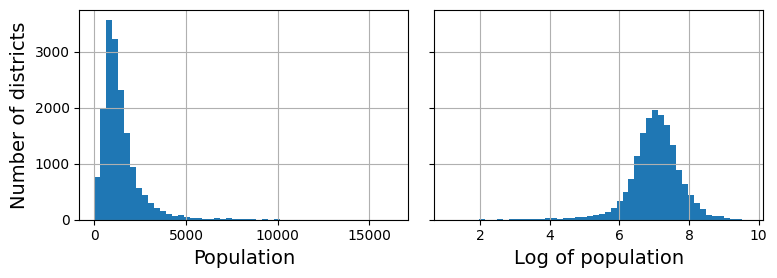

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
save_fig("long_tail_plot")
plt.show()

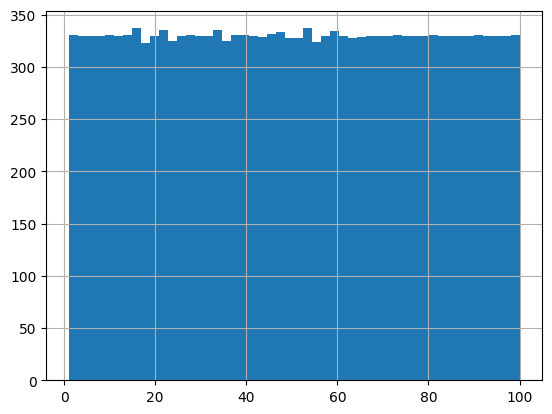

In [68]:
percentiles = [np.percentile(housing['median_income'],p) for p in range(1,100)]

flattened_median_income = pd.cut(housing['median_income'],
                                bins = [-np.inf]+percentiles+[np.inf],
                                 labels = range(1,100+1)
                                )

flattened_median_income.hist(bins=50)
plt.show()

(array([  51.,   55.,  157.,  205.,  123.,  140.,  160.,  165.,  219.,
         207.,  181.,  241.,  328.,  410.,  624.,  544.,  463.,  389.,
         378.,  371.,  328.,  352.,  391.,  468.,  489.,  390.,  381.,
         374.,  389.,  354.,  440.,  487.,  533.,  679.,  679.,  428.,
         317.,  301.,  242.,  236.,  292.,  282.,  277.,  231.,  195.,
         169.,  145.,  102.,  110., 1040.]),
 array([ 1.  ,  2.02,  3.04,  4.06,  5.08,  6.1 ,  7.12,  8.14,  9.16,
        10.18, 11.2 , 12.22, 13.24, 14.26, 15.28, 16.3 , 17.32, 18.34,
        19.36, 20.38, 21.4 , 22.42, 23.44, 24.46, 25.48, 26.5 , 27.52,
        28.54, 29.56, 30.58, 31.6 , 32.62, 33.64, 34.66, 35.68, 36.7 ,
        37.72, 38.74, 39.76, 40.78, 41.8 , 42.82, 43.84, 44.86, 45.88,
        46.9 , 47.92, 48.94, 49.96, 50.98, 52.  ]),
 <BarContainer object of 50 artists>)

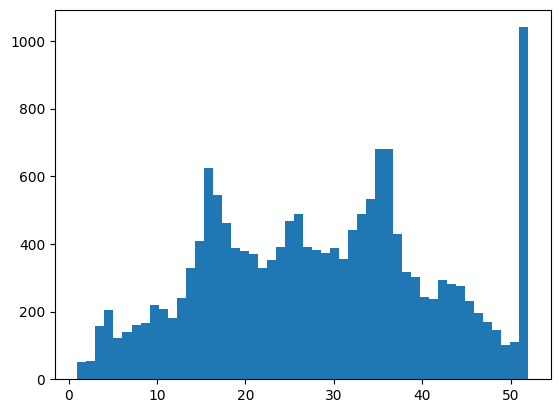

In [69]:
plt.hist(housing['housing_median_age'],bins= 50)

In [70]:

from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

In [71]:
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

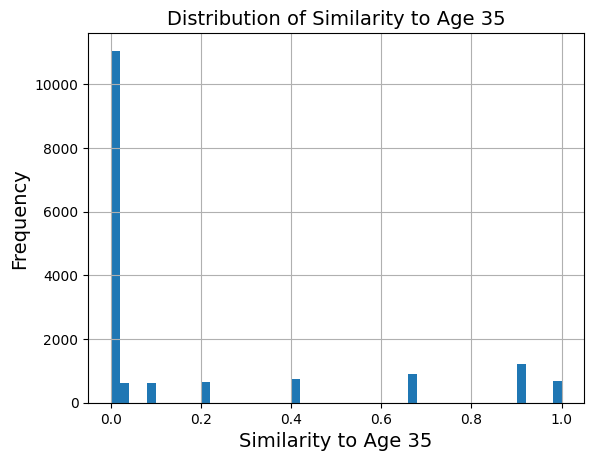

In [72]:
plt.hist(age_simil_35, bins=50)
plt.xlabel('Similarity to Age 35')
plt.ylabel('Frequency')
plt.title('Distribution of Similarity to Age 35')
plt.grid(True)
plt.show()

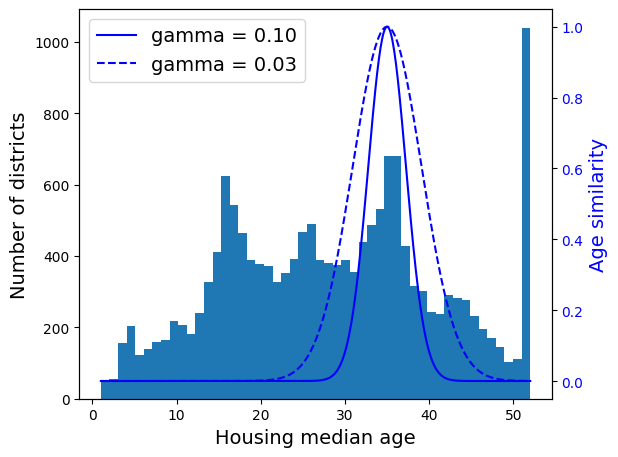

In [73]:
ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
save_fig("age_similarity_plot")
plt.show()

# Transform Target

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

In [76]:
model = LinearRegression()
model.fit(housing[['median_income']],scaled_labels)
some_new_data = housing[['median_income']].iloc[:5]

scaled_predictions = model.predict(some_new_data)

predictions = target_scaler.inverse_transform(scaled_predictions)



In [77]:
scaled_predictions

array([[-0.64466228],
       [ 0.80674175],
       [-0.52302364],
       [-0.5853166 ],
       [-0.12415952]])

In [78]:
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

## TransformedTargetRegressor

To do this transform and inverse transform in a in single step we can use **TransformedTargetRegressor** 

In [79]:
from sklearn.compose import TransformedTargetRegressor

In [80]:
model = TransformedTargetRegressor(LinearRegression(),
                                  transformer=StandardScaler())
# other parameters include if we want to scale : func and inverse_func

model.fit(housing[['median_income']],housing_labels)
predictions = model.predict(some_new_data)
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

## Custom Transformers

In [81]:
from sklearn.preprocessing import FunctionTransformer

In [82]:
log_transfomer = FunctionTransformer(np.log, inverse_func = np.exp)
log_pop = log_transfomer.transform(housing['population'])

(array([1.186e+04, 3.788e+03, 6.110e+02, 1.270e+02, 8.200e+01, 2.200e+01,
        1.200e+01, 6.000e+00, 1.000e+00, 3.000e+00]),
 array([3.00000e+00, 1.63320e+03, 3.26340e+03, 4.89360e+03, 6.52380e+03,
        8.15400e+03, 9.78420e+03, 1.14144e+04, 1.30446e+04, 1.46748e+04,
        1.63050e+04]),
 <BarContainer object of 10 artists>)

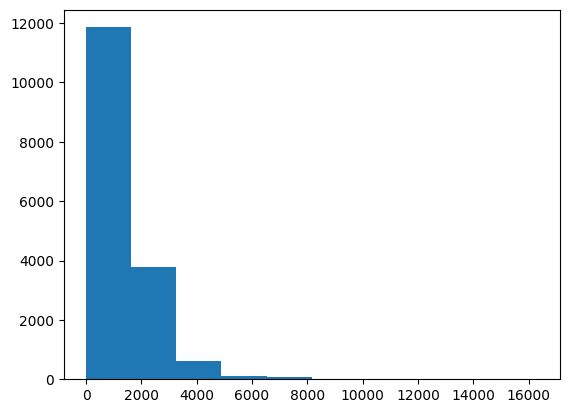

In [83]:

plt.hist(housing['population'])

(array([2.000e+00, 1.400e+01, 4.800e+01, 1.110e+02, 2.580e+02, 1.290e+03,
        7.184e+03, 6.423e+03, 1.080e+03, 1.020e+02]),
 array([1.09861229, 1.95867377, 2.81873525, 3.67879673, 4.53885821,
        5.39891969, 6.25898117, 7.11904265, 7.97910413, 8.83916561,
        9.69922709]),
 <BarContainer object of 10 artists>)

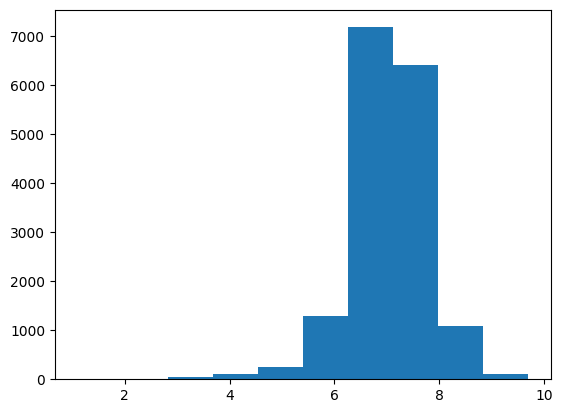

In [84]:
plt.hist(log_pop)

## Custom Class for transformers

In [85]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

In [86]:
class StandardScalerSasta(BaseEstimator, TransformerMixin):

    def __init__(self, with_mean = True):
        self.with_mean = with_mean


    def fit(self, X, y=None):
        X = check_array(X)
        self.mean = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]

        return self    #always fit method returns self

    def transform(self,X):
        check_is_fitted(self)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X-self.mean_
        return X/self.scale_

In [87]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [88]:

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)

similarities

array([[6.26675434e-17, 1.40931619e-01, 4.17057669e-14, ...,
        9.86615495e-01, 5.42432210e-08, 6.03972145e-01],
       [6.27287236e-01, 1.49980122e-09, 9.89545995e-01, ...,
        1.30559254e-13, 1.10891612e-01, 1.62296800e-10],
       [2.71931241e-17, 2.88731307e-01, 1.39051749e-14, ...,
        7.00100023e-01, 1.05721178e-08, 2.98432127e-01],
       ...,
       [1.25373126e-01, 2.69295229e-19, 2.37186217e-02, ...,
        5.49545386e-25, 8.28263834e-06, 1.27755043e-20],
       [6.36903428e-01, 9.22745279e-10, 9.94232085e-01, ...,
        8.34811844e-14, 1.06423027e-01, 1.12895602e-10],
       [2.03940751e-16, 1.42368832e-01, 1.26688464e-13, ...,
        9.46967976e-01, 1.33705785e-07, 6.95132975e-01]])

In [89]:
similarities.max(axis=1)

array([0.98661549, 0.98954599, 0.70010002, ..., 0.88643862, 0.99423208,
       0.94696798])

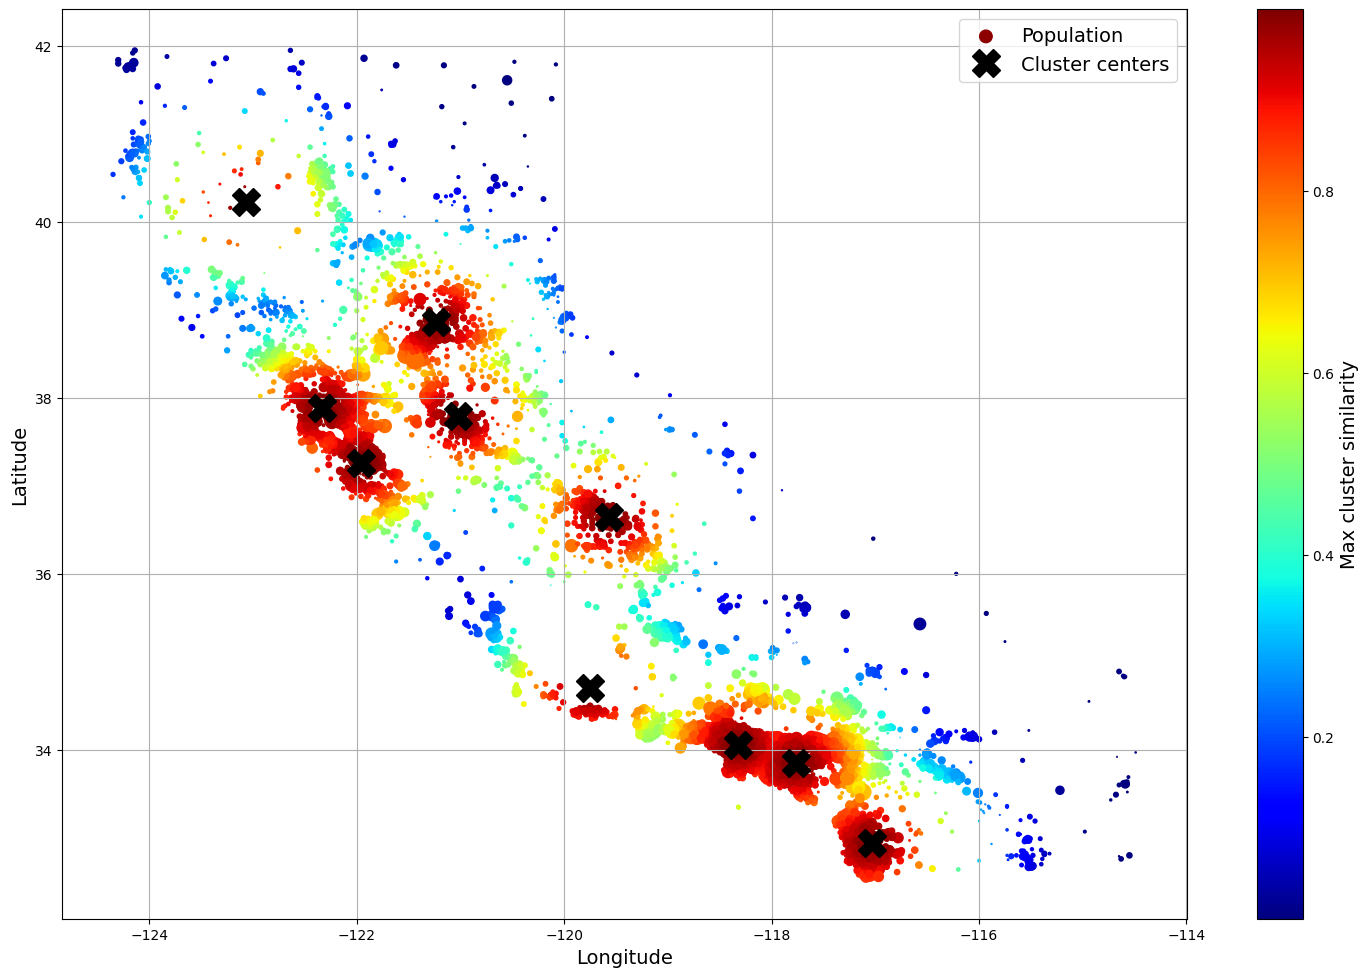

In [90]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False
                     , figsize=(15,10)
                    )
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
save_fig("district_cluster_plot")
plt.show()

# Pipelines

In [91]:
sklearn.set_config(display = "diagram")

In [92]:
from sklearn.pipeline import Pipeline

- names of the estimators should not have '__' double udnerscores.
- all estimators must be trasnformers with ```fit_transform()``` method except the last one; it can be an estimator, transformer, any other type .
  why this? it keeps consistent data flow from one step to another in pipeline.
- mostly pipelines have a predictor at the end
- if you dont want name the steps , use ```make_pipeline()``` function.

In [93]:
num_pipeline = Pipeline([
    ("simpleimputer",SimpleImputer(strategy="mean"))
    ,("standardize",StandardScaler())
    ,
])
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardize', StandardScaler())])

In [94]:
from sklearn.pipeline import make_pipeline

In [95]:
num_pipeline_2 = make_pipeline(SimpleImputer(strategy = 'median'),StandardScaler())
num_pipeline_2

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

Pipeline object also has ```fit()``` , ```tansform()``` and ```fit_transform()``` methods

In [96]:
num_pipeline.steps

[('simpleimputer', SimpleImputer()), ('standardize', StandardScaler())]

In [97]:
num_pipeline[0]

SimpleImputer()

In [98]:

num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer())])

In [99]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer()

In [100]:
num_pipeline.steps[0][1]

SimpleImputer()

In [101]:
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

# ColumnTransformer

In [102]:
from sklearn.compose import ColumnTransformer

In [103]:
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

print(cat_pipeline)
print(preprocessing)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))])
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                         

In [104]:
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])

- listing column names can be tideous sometimes so we use ```make_column_selector()```
- dont want to name transformations? use ```make_column_transformer```

In [105]:
from sklearn.compose import make_column_selector, make_column_transformer


In [106]:
preprocessing_2 = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

preprocessing_2

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f26fc457b20>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f26fc457c40>)])

In [107]:
housing_prepared = preprocessing.fit_transform(housing)

In [108]:
type(housing_prepared)

numpy.ndarray

In [109]:
housing_prepared_fr = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=housing.index)
housing_prepared_fr.sample(3)

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
6046,0.616389,-0.795858,0.669257,0.213982,0.865582,1.854728,0.611224,-0.892461,1.0,0.0,0.0,0.0,0.0
10163,0.961292,-0.955240,-1.237721,-0.146623,-0.255753,-0.385028,-0.313410,0.667364,1.0,0.0,0.0,0.0,0.0
18983,-0.918179,1.388624,-0.999348,1.266507,2.202648,1.002488,1.998175,-0.963766,0.0,1.0,0.0,0.0,0.0


In [110]:
housing_prepared_fr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   num__longitude                   16512 non-null  float64
 1   num__latitude                    16512 non-null  float64
 2   num__housing_median_age          16512 non-null  float64
 3   num__total_rooms                 16512 non-null  float64
 4   num__total_bedrooms              16512 non-null  float64
 5   num__population                  16512 non-null  float64
 6   num__households                  16512 non-null  float64
 7   num__median_income               16512 non-null  float64
 8   cat__ocean_proximity_<1H OCEAN   16512 non-null  float64
 9   cat__ocean_proximity_INLAND      16512 non-null  float64
 10  cat__ocean_proximity_ISLAND      16512 non-null  float64
 11  cat__ocean_proximity_NEAR BAY    16512 non-null  float64
 12  cat__ocean_proximit

### Adding all tranfsromations till now into a single pipeline

- imputing missing values in numerical columns with *median*
- one-hot encoding categorical features
- adding few features : bedrooms_ratio,
rooms_per_house, and people_per_hous
- adding few cluster similarity feature
- applying log trasnformation to skewed features
- standardizing all numerical featurese

In [111]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)

In [112]:
log_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('functiontransformer',
                 FunctionTransformer(feature_names_out='one-to-one',
                                     func=<ufunc 'log'>)),
                ('standardscaler', StandardScaler())])

In [113]:
preprocessing

ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                             SimpleImputer(strategy='median')),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('bedrooms',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x7f26fc48c0d0>,
                                                                      func=<function column_ratio...
                                 ['total_bedrooms', 'total_rooms', 'population',
                                  'households', 'median_income']),
                                ('geo', ClusterSimilarity(random_state=42),
                                 ['latitude', 'longitude']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f26fc477a60>)])

In [114]:
housing = housing.drop(columns = ['id','income_cat'])

In [115]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [116]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

# Selecting and Training a Model

In [117]:
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing,housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7f2...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f26fc477a60>)])),
                ('linearregression', LinearRegression())])

In [118]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)

array([243700., 372400., 128800.,  94400., 328300.])

In [119]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [120]:
from sklearn.metrics import mean_squared_error

In [121]:
lin_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
lin_rmse

68687.89176590023

In [122]:
pd.Series(lin_rmse).describe()

count        1.000000
mean     68687.891766
std               NaN
min      68687.891766
25%      68687.891766
50%      68687.891766
75%      68687.891766
max      68687.891766
dtype: float64

In [123]:
from sklearn.tree import DecisionTreeRegressor

In [124]:
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7f2...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f26fc477a60>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [125]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
tree_rmse

0.0

# Cross-Validation

In [126]:
from sklearn.model_selection import cross_val_score

In [127]:
tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [128]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     66868.027288
std       2060.966425
min      63649.536493
25%      65338.078316
50%      66801.953094
75%      68229.934454
max      70094.778246
dtype: float64

In [129]:
from sklearn.ensemble import RandomForestRegressor

In [130]:
forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [131]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47019.561281
std       1033.957120
min      45458.112527
25%      46464.031184
50%      46967.596354
75%      47325.694987
max      49243.765795
dtype: float64

# HyperParameter Tuning

## Grid Search

In [132]:
from sklearn.model_selection import GridSearchCV

In [133]:
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f26fc477a60>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [137]:
print(str(full_pipeline.get_params().keys())[:100])

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__n_jobs', 


In [141]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,6.562858,0.028409,0.160225,0.005498,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-43459.598047,-43918.632694,-44747.781772,-44042.004171,533.085183,1
13,8.229981,0.156249,0.158237,0.000510,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-44132.027207,-44075.251239,-45009.672809,-44405.650418,427.736807,2
14,9.580505,0.073827,0.159719,0.002512,15,10,"{'preprocessing__geo__n_clusters': 15, 'random...",-44374.325167,-44285.549219,-45316.375999,-44658.750128,466.421934,3
7,6.359136,0.127880,0.156992,0.002055,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44683.355320,-44654.825561,-45657.384730,-44998.521871,466.031964,4
9,6.359287,0.045126,0.157231,0.001439,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44683.355320,-44654.825561,-45657.384730,-44998.521871,466.031964,4
